<a href="https://colab.research.google.com/github/margiitazhr/Manova_Statistike_Multivariat/blob/main/Manova_Statistika_Multivariat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama  : Margita Zahra Ramandanisya
### NIM   : 11220940000008
### Kelas : Statistika multivariat-B

# Permasalahan

Di tengah persaingan pasar sepeda motor yang begitu padat, tiap merek berlomba menonjolkan keunggulannya, ada yang lebih nyaman, ada yang irit BBM, ada juga yang unggul soal servis atau kecepatan. Tapi apakah persepsi itu benar-benar berdampak pada tingkat kepuasan pengguna secara signifikan?

Melalui analisis statistik, saya mencoba seberapa besar pengaruh merek terhadap persepsi konsumen di aspek-aspek penting tersebut?

# Metode

MANOVA (Multivariate Analysis of Variance) adalah metode statistik yang digunakan untuk menguji apakah terdapat perbedaan yang signifikan antara dua atau lebih kelompok terhadap beberapa variabel dependen sekaligus. MANOVA mempertimbangkan hubungan antar variabel dependen, sehingga hasilnya lebih menyeluruh.

Kenapa cocok untuk studi merek motor dan kepuasan pengguna?

1. Merek motor (Honda, Yamaha, Suzuki) = kelompok yang dibandingkan

2. Aspek-aspek kepuasan (kenyamanan, efisiensi BBM, kemudahan servis, dan Kecepatan) = variabel yang saling terkait

3. Kita ingin tahu apakah kepuasan pengguna berbeda secara keseluruhan antar merek, bukan hanya per aspek

4. MANOVA menghindari kesalahan jika kita uji satu per satu, dan memberikan gambaran utuh tentang pola perbedaan antar merek.



# Asumsi
1. Skor kepuasan diukur dalam skala 1–100(%) dan dianggap valid untuk mewakili

2. persepsi pengguna.

3. Setiap responden hanya menilai satu merek motor (Honda, Yamaha, atau Suzuki).

4. Aspek kepuasan (kenyamanan, efisiensi BBM, kemudahan servis, kecepatan)dianggap independen.

5. Analisis mengasumsikan data berdistribusi normal dan homogen antar grup, sesuai asumsi dasar MANOVA.

6. Fokusnya adalah pengaruh merek terhadap keseluruhan pengalaman pengguna, bukan hanya satu aspek kepuasan.

# Import Modul

In [ ]:
!pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

# Generate Data Random

In [ ]:
import numpy as np
import pandas as pd

# Set seed untuk hasil tetap
np.random.seed(82)

# Jumlah responden
n = 200

# Merek motor
brands = ["Honda", "Yamaha", "Suzuki"]
X = np.random.choice(brands, size=n)

# Fungsi skor persen berdasar merek
def generate_scores(brand):
    if brand == "Honda":
        kenyamanan = np.random.normal(loc=80, scale=7)
        efisiensi = np.random.normal(loc=85, scale=6)
        servis = np.random.normal(loc=77, scale=8)
        kecepatan = np.random.normal(loc=83, scale=6.5)
    elif brand == "Yamaha":
        kenyamanan = np.random.normal(loc=83, scale=7)
        efisiensi = np.random.normal(loc=78, scale=6.5)
        servis = np.random.normal(loc=74, scale=7.5)
        kecepatan = np.random.normal(loc=83, scale=6.5)
    elif brand == "Suzuki":
        kenyamanan = np.random.normal(loc=75, scale=7)
        efisiensi = np.random.normal(loc=70, scale=7)
        servis = np.random.normal(loc=80, scale=7)
        kecepatan = np.random.normal(loc=86, scale=6.5)
    return [kenyamanan, efisiensi, servis, kecepatan]

# Generate data Y
Y_scores = np.array([generate_scores(b) for b in X])

# DataFrame akhir
df = pd.DataFrame({
    "Merek_Motor": X,
    "Kenyamanan": Y_scores[:, 0],
    "Efisiensi_BBM": Y_scores[:, 1],
    "Kemudahan_Servis": Y_scores[:, 2],
    "Kecepatan": Y_scores[:, 3]
})

# Bulatkan dan pastikan skor 1–100
for col in ["Kenyamanan", "Efisiensi_BBM", "Kemudahan_Servis", "Kecepatan"]:
    df[col] = df[col].clip(1, 100).round().astype(int)

df


,Merek_Motor,Kenyamanan,Efisiensi_BBM,Kemudahan_Servis,Kecepatan
0,Suzuki,75,78,65,80
1,Yamaha,82,80,70,87
2,Yamaha,88,91,78,86
3,Suzuki,80,73,85,89
4,Suzuki,82,79,68,89
...,...,...,...,...,...
195,Yamaha,78,72,70,79
196,Honda,77,96,63,77
197,Honda,80,75,73,88
198,Suzuki,87,77,76,88


# Uji Normalitas Multivariat

In [ ]:
data_honda = df[df['Merek_Motor'] == 'Honda'][['Kenyamanan', 'Efisiensi_BBM', 'Kemudahan_Servis', 'Kecepatan']]
data_yamaha = df[df['Merek_Motor'] == 'Yamaha'][['Kenyamanan', 'Efisiensi_BBM', 'Kemudahan_Servis', 'Kecepatan']]
data_suzuki = df[df['Merek_Motor'] == 'Suzuki'][['Kenyamanan', 'Efisiensi_BBM', 'Kemudahan_Servis', 'Kecepatan']]

print('Uji normalitas multivariat - Honda:\n', pg.multivariate_normality(data_honda, alpha=0.05))
print('Uji normalitas multivariat - Yamaha:\n', pg.multivariate_normality(data_yamaha, alpha=0.05))
print('Uji normalitas multivariat - Suzuki:\n', pg.multivariate_normality(data_suzuki, alpha=0.05))

Uji normalitas multivariat - Honda:
 HZResults(hz=np.float64(47.5234731115354), pval=np.float64(6.854167278984347e-208), normal=False)
Uji normalitas multivariat - Yamaha:
 HZResults(hz=np.float64(64.58121637685458), pval=np.float64(2.836136894276878e-257), normal=False)
Uji normalitas multivariat - Suzuki:
 HZResults(hz=np.float64(44.99205347597514), pval=np.float64(4.8153775499104565e-200), normal=False)


Data tidak berdistribusi normal multivariat, sehingga kita perlu menerapkan transformasi data.

In [ ]:
data_honda_trans = np.log(data_honda)
data_yamaha_trans = np.log(data_yamaha)
data_suzuki_trans = np.log(data_suzuki)

# Uji normalitas multivariat setelah transformasi
print('Uji normalitas multivariat - Honda (log):\n', pg.multivariate_normality(data_honda_trans, alpha=0.05))
print('Uji normalitas multivariat - Yamaha (log):\n', pg.multivariate_normality(data_yamaha_trans, alpha=0.05))
print('Uji normalitas multivariat - Suzuki (log):\n', pg.multivariate_normality(data_suzuki_trans, alpha=0.05))


Uji normalitas multivariat - Honda (log):
 HZResults(hz=np.float64(0.889316937229076), pval=np.float64(0.1432916855902655), normal=True)
Uji normalitas multivariat - Yamaha (log):
 HZResults(hz=np.float64(0.6749386500314682), pval=np.float64(0.8911867165041932), normal=True)
Uji normalitas multivariat - Suzuki (log):
 HZResults(hz=np.float64(0.8623228564744502), pval=np.float64(0.19351580530531964), normal=True)


Data sudah berdistribusi normal multivariat.

# Uji homogenitas

In [ ]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_honda_trans, data_yamaha_trans, data_suzuki_trans])
data_trans_manova['Merek_Motor'] = df['Merek_Motor'].copy()
data_trans_manova

,Kenyamanan,Efisiensi_BBM,Kemudahan_Servis,Kecepatan,Merek_Motor
6,4.330733,4.499810,4.564348,4.394449,Honda
11,4.304065,4.465908,4.276666,4.465908,Honda
15,4.369448,4.454347,4.189655,4.477337,Honda
16,4.317488,4.477337,4.317488,4.406719,Honda
21,4.564348,4.465908,4.442651,4.382027,Honda
...,...,...,...,...,...
185,4.262680,4.204693,4.204693,4.510860,Suzuki
188,4.317488,4.189655,4.369448,4.584967,Suzuki
190,4.234107,4.189655,4.521789,4.477337,Suzuki
193,4.262680,4.276666,4.276666,4.262680,Suzuki


In [ ]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Kenyamanan', 'Efisiensi_BBM', 'Kemudahan_Servis', 'Kecepatan' ], group='Merek_Motor' )

,Chi2,df,pval,equal_cov
box,26.256893,20.0,0.157494,True


Terlihat bahwa data sudah homogen.

# Manova

In [ ]:
manova_model = MANOVA. from_formula('Kenyamanan + Efisiensi_BBM + Kemudahan_Servis + Kecepatan ~ Merek_Motor', data=data_trans_manova)
manova_results = manova_model.mv_test()
print(manova_results)

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0003 4.0000 194.0000 165340.5085 0.0000
         Pillai's trace    0.9997 4.0000 194.0000 165340.5085 0.0000
 Hotelling-Lawley trace 3409.0826 4.0000 194.0000 165340.5085 0.0000
    Roy's greatest root 3409.0826 4.0000 194.0000 165340.5085 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
         Merek_Motor        Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.4669  8.0000  388.0000 

Hasil uji MANOVA ini menunjukkan bahwa variabel Merek_Motor berpengaruh signifikan secara multivariat terhadap gabungan variabel kepuasan (Kenyamanan, Efisiensi_BBM, Kemudahan_Servis, dan Kecepatan).

# Uji Post Hoc


In [ ]:
tukey_Kenyamanan = pg.pairwise_tukey(data=data_trans_manova, dv='Kenyamanan', between='Merek_Motor')
print("Tukey Post-hoc untuk variabel Kenyamanan")
tukey_Kenyamanan

Tukey Post-hoc untuk variabel Kenyamanan


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Honda,Suzuki,4.379512,4.31968,0.059832,0.014979,3.994288,2.691221e-04,0.661164
1,Honda,Yamaha,4.379512,4.42161,-0.042098,0.013846,-3.040342,7.533948e-03,-0.519995
2,Suzuki,Yamaha,4.319680,4.42161,-0.101929,0.014049,-7.255218,2.687894e-11,-1.347982


In [ ]:
tukey_Efisiensi_BBM = pg.pairwise_tukey(data=data_trans_manova, dv='Efisiensi_BBM', between='Merek_Motor')
print("Tukey Post-hoc untuk variabel Efisiensi_BBM")
tukey_Efisiensi_BBM

Tukey Post-hoc untuk variabel Efisiensi_BBM


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Honda,Suzuki,4.429314,4.270612,0.158702,0.016247,9.767962,0.000000e+00,1.701373
1,Honda,Yamaha,4.429314,4.354649,0.074665,0.015018,4.971610,4.295912e-06,0.928630
2,Suzuki,Yamaha,4.270612,4.354649,-0.084037,0.015238,-5.514869,3.253501e-07,-0.896055


In [ ]:
tukey_Kemudahan_Servis = pg.pairwise_tukey(data=data_trans_manova, dv='Kemudahan_Servis', between='Merek_Motor')
print("Tukey Post-hoc untuk variabel Kemudahan_Servis")
tukey_Kemudahan_Servis

Tukey Post-hoc untuk variabel Kemudahan_Servis


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Honda,Suzuki,4.33487,4.376340,-0.041470,0.018626,-2.226442,0.069248,-0.409204
1,Honda,Yamaha,4.33487,4.292374,0.042496,0.017217,2.468172,0.038200,0.409099
2,Suzuki,Yamaha,4.37634,4.292374,0.083966,0.017470,4.806408,0.000009,0.831023


In [ ]:
tukey_Kecepatan = pg.pairwise_tukey(data=data_trans_manova, dv='Kecepatan', between='Merek_Motor')
print("Tukey Post-hoc untuk variabel Kecepatan")
tukey_Kecepatan

Tukey Post-hoc untuk variabel Kecepatan


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Honda,Suzuki,4.389473,4.453141,-0.063668,0.013490,-4.719598,0.000013,-0.852699
1,Honda,Yamaha,4.389473,4.419993,-0.030520,0.012470,-2.447528,0.040278,-0.413000
2,Suzuki,Yamaha,4.453141,4.419993,0.033148,0.012652,2.619892,0.025570,0.451156


# Visualisasi

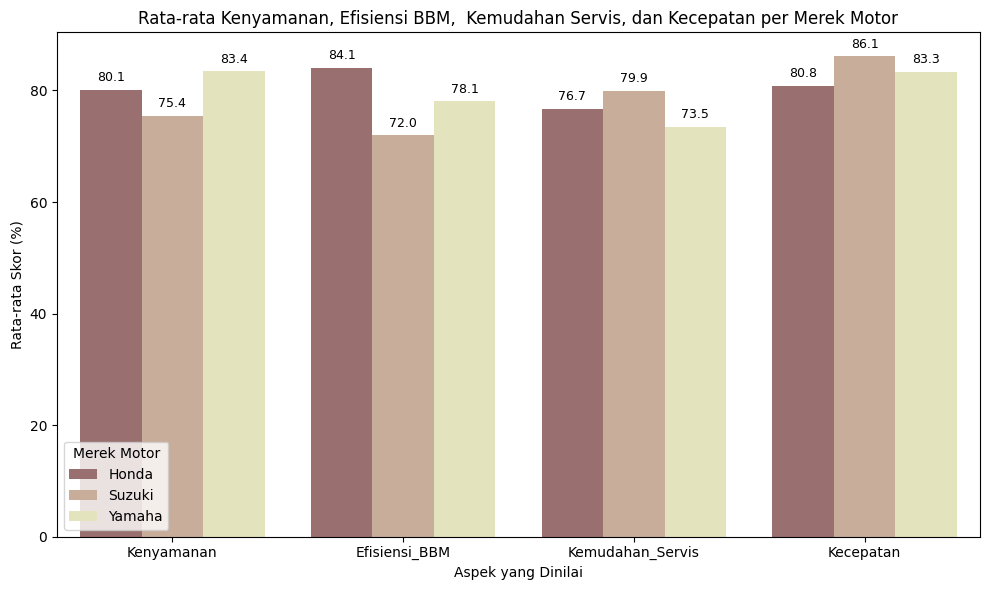

In [ ]:
# Hitung rata-rata tiap merek dan variabel
group_means = df.groupby('Merek_Motor')[['Kenyamanan', 'Efisiensi_BBM', 'Kemudahan_Servis', 'Kecepatan']].mean().reset_index()

# Ubah ke long format
df_melt = pd.melt(group_means, id_vars='Merek_Motor', var_name='Variabel', value_name='Rata-rata')

plt.figure(figsize=(10,6))
# Tukar posisi x dan hue
ax = sns.barplot(data=df_melt, x='Variabel', y='Rata-rata', hue='Merek_Motor', palette='pink')

plt.title('Rata-rata Kenyamanan, Efisiensi BBM,  Kemudahan Servis, dan Kecepatan per Merek Motor')
plt.xlabel('Aspek yang Dinilai')
plt.ylabel('Rata-rata Skor (%)')

# Tambah nilai rata-rata di atas bar
for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.legend(title='Merek Motor')
plt.tight_layout()
plt.show()


Berdasarkan berplot tersebut, dapat diperoleh bahwa:
*   Yamaha memiliki skor tertinggi pada aspek kenyamanan (83,4%), ini menunjukkan bahwa konsumen merasa paling nyaman menggunakan motor merek ini dibanding yang lain.
*   Honda unggul pada aspek efisiensi BBM (84,1%), menandakan bahwa motor Honda dinilai paling hemat bahan bakar oleh responden.
*   Suzuki unggul dalam aspek kemudahan servis (79,9%) dan kecepatan (86,1%), menunjukkan bahwa motor Suzuki dianggap paling mudah dalam perawatan dan memiliki performa kecepatan terbaik.

Dari hasil ini dapat disimpulkan bahwa tiap merek memiliki kekuatan pada aspek tertentu, sehingga pemilihan motor sangat tergantung pada kebutuhan utama konsumen, apakah lebih mengutamakan kenyamanan, efisiensi, kemudahan servis, atau kecepatan.



